# PREDICTING CHURNING CUSTOMERS

DEFINING THE QUESTION

a) Specifying the question

Creating different models that can predict whether a customer churns or not given the customer's information.

b) Defining the metric for success

Picking a model with the best precision score.

c) Understanding the context

Retaining customers is probably one of the hardest tasks that industries have to undertake; it is a measure of growth. According to news reported in the past, companies mostly invest in getting new customers rather than investing in the ones they have. Does it mean that getting new customers is way easier than retaining them? 
It is a given fact that the market is growing and competition continues to grow too. Customers churn because they are dissatisfied. Churning is a measure of the number of individuals moving out over a specific period. Credit card churning is the frequent opening of credit cards to get signed up on bonuses and then cancel them. 
Banks, in particular, require to constantly improve their services especially the credit card service in order to keep customers. They constantly “dish out” digital services and not really focus on how the customers feel about that particular service. They have not been able to maintain their premium customers, denting their revenue. On the other hand, they have tried sending out surveys to them to try and understand why they’re dissatisfied. Unfortunately, the surveys get a very poor response of about **5-30%**.

d) Experimental design

Below is the expected flow of our work:

* Data Cleaning and Preparation
 * Load libraries and dataset
 * Deal with missing values
 * Deal with duplicated records
* Perform EDA
  * Univariate Analysis
  * Bivariate Analysis
* Modelling
* Feature Engineering
* Instantiating the Classifiers
* Performance Evaluation
* Performance Analysis
* Conclusion

e) Data relevance

* CLIENTNUM - Unique identifier for the customer holding the account.
* Attrition_Flag - Internal event (customer activity) variable - if the account is closed then 1 else 0.
* Customer_Age - Demographic variable - Customer's Age in Years
* Gender - Demographic variable - M=Male, F=Female
* Dependent_count - Number of dependents
* Education_Level - Educational Qualification of the account holder (example: high school, college graduate, etc.)
* Marital_Status - Married, Single, Divorced, Unknown
* Income_Category - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
* Card_Category - Type of Card (Blue, Silver, Gold, Platinum)
* Months_on_book - Period of relationship with bank
* Total_Relationship_Count - Total no. of products held by the customer
* Months_Inactive_12_mon - No. of months inactive in the last 12 months
* Contacts_Count_12_mon - No. of Contacts in the last 12 months
* Credit_Limit - Credit Limit on the Credit Card
* Total_Revolving_Bal - Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1 - Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt - Total Transaction Amount (Last 12 months)
* Total_Trans_Ct - Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1 - Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio - Average Card Utilization Ratio



## READING OUR DATA

In [93]:
## Importing our libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [143]:
# Loading our dataset
df=pd.read_csv(r'C:\Users\Njuguna\Downloads\BankChurners.csv')

In [12]:
# Previewing our dataset

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [13]:
# Checking the data types

df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [14]:
# Checking the dimensions of our dataset
df.shape

(10127, 23)

## Data Cleaning

In [15]:
# We need to see if we have any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

CLIENTNUM - 0%
Attrition_Flag - 0%
Customer_Age - 0%
Gender - 0%
Dependent_count - 0%
Education_Level - 0%
Marital_Status - 0%
Income_Category - 0%
Card_Category - 0%
Months_on_book - 0%
Total_Relationship_Count - 0%
Months_Inactive_12_mon - 0%
Contacts_Count_12_mon - 0%
Credit_Limit - 0%
Total_Revolving_Bal - 0%
Avg_Open_To_Buy - 0%
Total_Amt_Chng_Q4_Q1 - 0%
Total_Trans_Amt - 0%
Total_Trans_Ct - 0%
Total_Ct_Chng_Q4_Q1 - 0%
Avg_Utilization_Ratio - 0%
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 - 0%
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 - 0%


In [77]:
# Drooping Unused columns

df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],1, inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [144]:
# Replacing the unknown values with missing values.

df.replace('Unknown', np.nan, inplace = True)

# Replacing the missing values in each column with the mode of their respective columns.
unknown = df[['Income_Category','Education_Level','Marital_Status']]
for column in unknown:
    df[column].fillna(df[column].mode()[0], inplace=True)

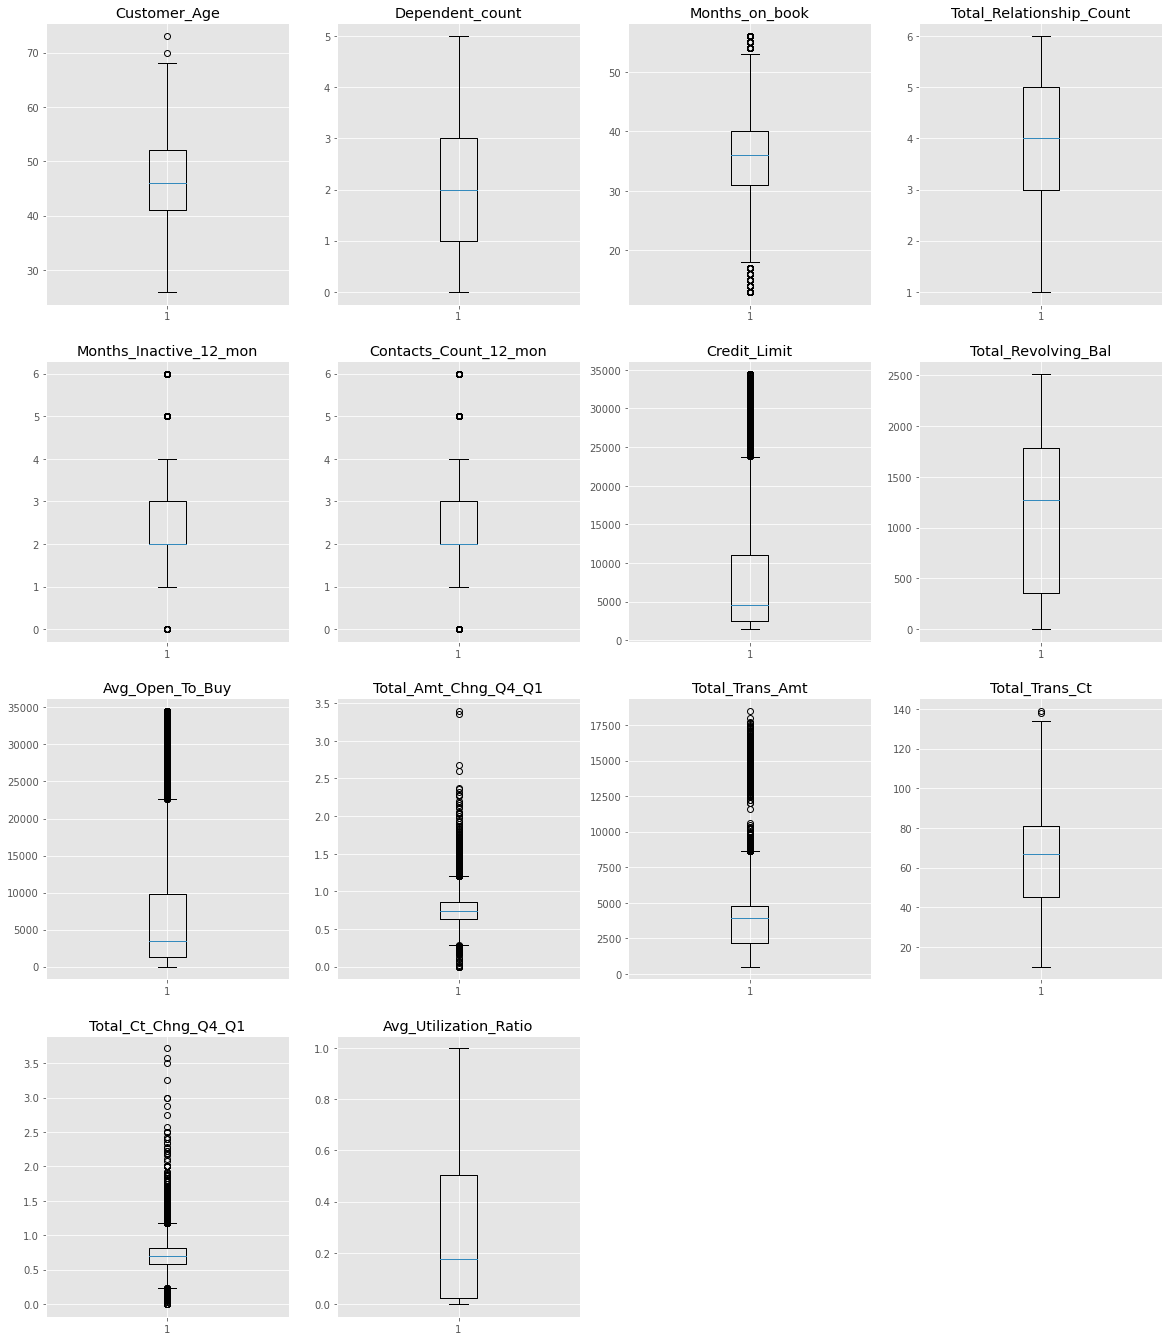

In [16]:
#Checking for outliers 
Numerics = {'Customer_Age':1,'Dependent_count':2,'Months_on_book':3,'Total_Relationship_Count':4,'Months_Inactive_12_mon':5,
                  'Contacts_Count_12_mon':6,'Credit_Limit':7,'Total_Revolving_Bal':8,'Avg_Open_To_Buy':9,'Total_Amt_Chng_Q4_Q1':10,
                  'Total_Trans_Amt':11,'Total_Trans_Ct':12,'Total_Ct_Chng_Q4_Q1':13,'Avg_Utilization_Ratio':14}

plt.figure(figsize=(20,30))

#Visualizing the Information on a boxplot:
for variable,i in Numerics.items():
  plt.subplot(5,4,i)
  plt.boxplot(df[variable])
  plt.title(variable)
plt.show()

- Most of the Product Variables have existing Outliers.
 
- Since there's no basis to assume the entries are not valid observations, no outliers are dropped.

## EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS

In [78]:
# Checking the statistical summary.

df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


- Looking at the information on:
   - Months on Book: The minimum and maximum number of months is 13 and 56 respectively. The model created therefore will be good at predicting customers who are at least 1 year 1 month old and not more than 5 years.
   - Total Relationship Count:  6 is the highest number of Accounts a Customer had with the bank while 1 is the lowest number. Further analysis can be done to establish if any relationship exists between total number of accounts and Churning.
   - Months Inactive: The least Number of months a Customer stayed without carrying out any transaction with the card was 0 while the most was 6. Exploring to be done on whether the more inactive a customer stays the likely they are to churn.
   - Contacts Count: 6 is the most Number of times a Customer had contacted the Company in the past 12 months. The more the contact, the more they are likely to churn since it could be a case of Customer disatisfaction.

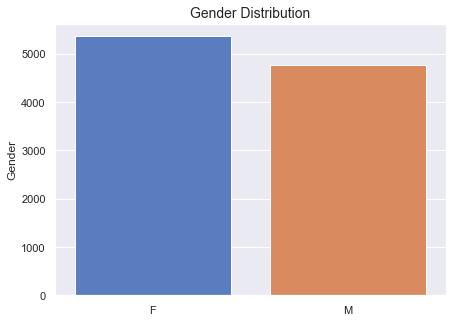

In [69]:
#To view gender distribution:
Gender = df.Gender.value_counts()
Gender
# Males: 4,769       Females: 5,358

#Plotting observations:
plt.figure(figsize= (7,5))
fontsize = 14
plt.title("Gender Distribution", fontsize = fontsize)
sns.barplot(x=Gender.index, y=Gender, palette='muted');

In as much as majority of the Customers are Females, the distribution is relatively equal there being only around 6% more females than males.

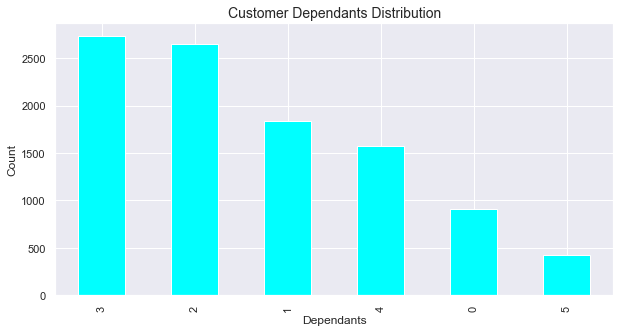

In [70]:
# Checking the number of family members dependent on the customer.

plt.figure(figsize = (10,5))
fontsize = 14
df['Dependent_count'].value_counts().plot(kind = 'bar', color = 'Cyan')
plt.xlabel('Dependants')
plt.ylabel('Count')
plt.title('Customer Dependants Distribution',fontsize = fontsize)
plt.show()

Majority of the customers have 3 dependents.

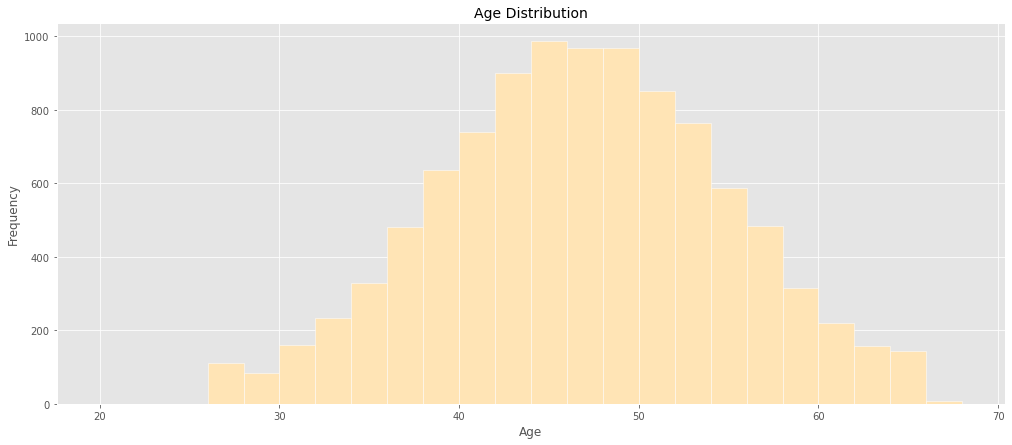

In [44]:
# Checking the customer age distribution.

plt.figure(figsize= (17, 7))
fontsize = 14
plt.hist(df.Customer_Age, bins= np.arange(20, 70, 2), color='moccasin', edgecolor='white')
plt.title('Age Distribution', fontsize = fontsize)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show();

Most of the customers are in the 40-50 age group.

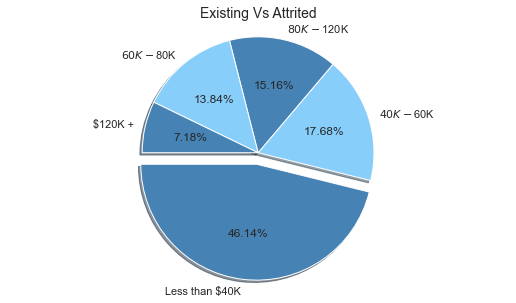

In [72]:
#Viewing the ratio of churned customers:

income= df['Income_Category'].value_counts(normalize=True)*100
income
# Existing Customers: 8500    Attrited/Lost Customer:  1627

#Visualizing the information on a pie chart:
labels= ['Less than $40K','$40K - $60K','$80K - $120K','$60K - $80K','$120K +']
colors=['steelblue', 'lightskyblue']
fontsize = 14
plt.figure(figsize= (9, 5))
plt.title("Existing Vs Attrited", fontsize = fontsize)
plt.pie(income,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0.1, 0,0,0,0,), autopct='%1.2f%%')
plt.axis('equal')
plt.show()

Majority of the customers are earning less than 40k.

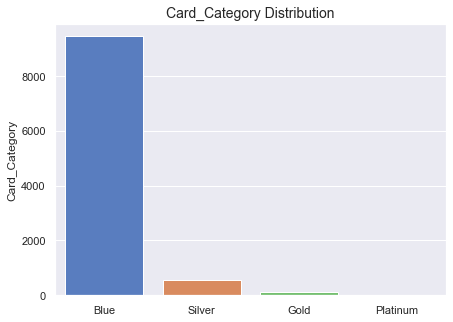

In [73]:
#To view Card Category distribution:
Card_Category = df.Card_Category.value_counts()
Card_Category
# Males: 4,769       Females: 5,358

#Plotting observations:
plt.figure(figsize= (7,5))
fontsize = 14
plt.title("Card_Category Distribution", fontsize = fontsize)
sns.barplot(x=Card_Category.index, y=Card_Category, palette='muted');

Most customers have a blue card.

While Credit Card hierarchy might be different across institutions, the different colours can give a general idea of the Card’s credit limit and rewards features list.

Being that most of the customers from the data sampled earned less than $40K, Blue can easily be identified as the Standard Card with Silver and Gold being more prestigious.

[Platinum](https://www.canstar.com.au/credit-cards/colour-credit-card-mean/) on the other hand is usually considered as the top-tier/most expensive card.

BIVARIATE ANALYSIS

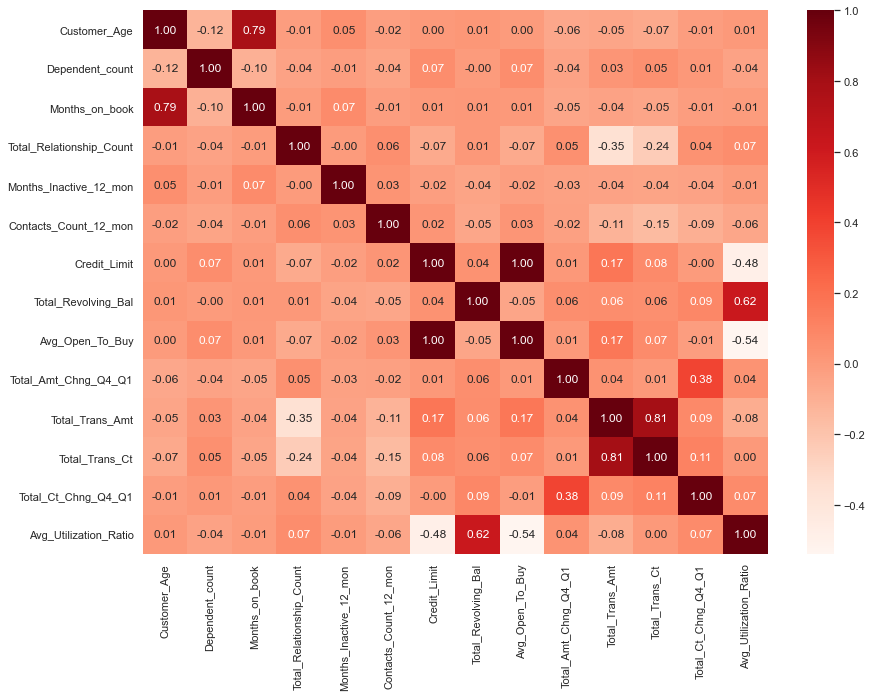

In [80]:
#Plotting a heat map to show correlation between the different variables
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(method ='pearson'),annot=True,cmap="Reds",fmt=".2f");
plt.show()

* Customer_age has a strong positive correlation with months_on_book.
* Total_Revolving_Bal has a moderate positive correlation with Avg_Utilization_Ratio.
* Total_trans_Amt has a strong positive correlation with Total_Trans_Ct.
* Credit_Limit has a perfect correlation with Avg_Open_To_Buy.

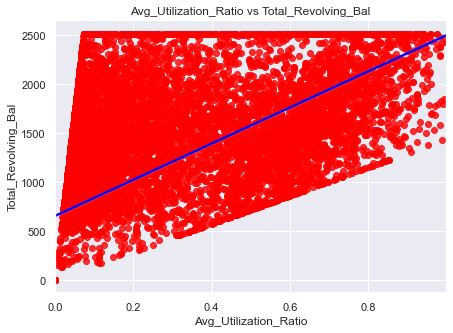

In [81]:
#Plotting Scatter plot to show correlation 

plt.figure(figsize= (7,5))
sns.regplot(x="Avg_Utilization_Ratio", y="Total_Revolving_Bal", data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})
plt.xlabel('Avg_Utilization_Ratio')
plt.ylabel('Total_Revolving_Bal')
plt.title('Avg_Utilization_Ratio vs Total_Revolving_Bal')
plt.show();

Avg_Utilization_Ratio is positively correlated to  Total_Revolving_Bal

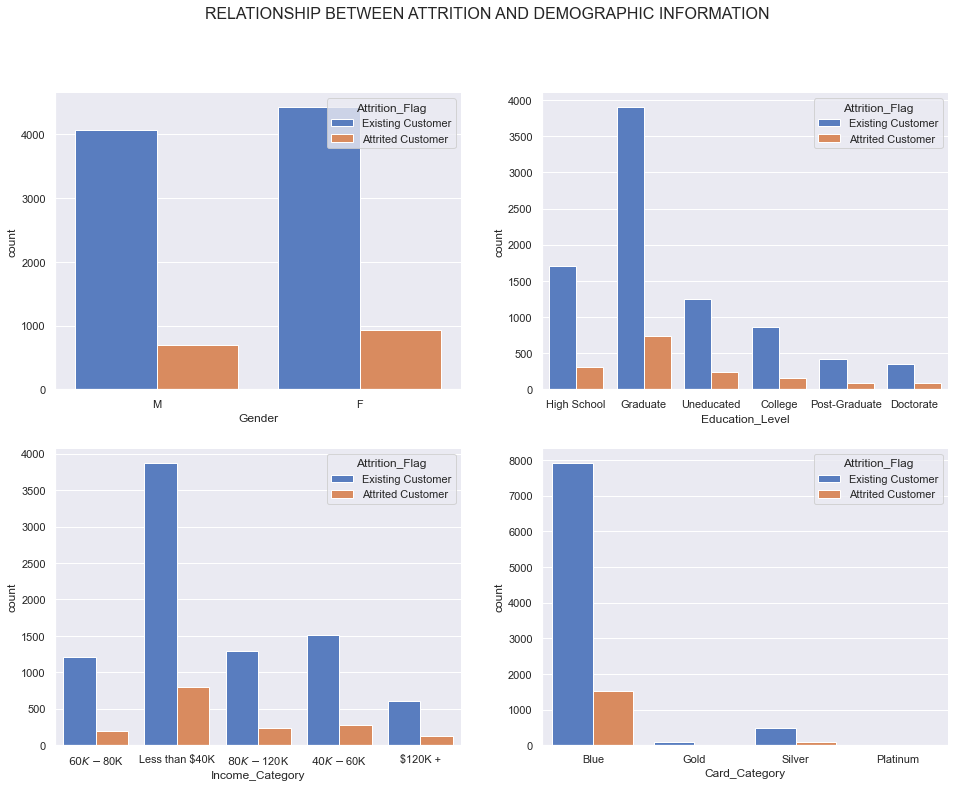

In [82]:
#Viewing the influence Demographic Information  has on Customer Attrition:

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
#Indicating the Title:
fig.suptitle('RELATIONSHIP BETWEEN ATTRITION AND DEMOGRAPHIC INFORMATION', fontsize = 16)
#Plotting the suplots:
sns.countplot(ax=axes[0, 0], data=df, x='Gender',hue='Attrition_Flag',palette='muted')
sns.countplot(ax=axes[0, 1], data=df, x='Education_Level',hue='Attrition_Flag',palette='muted')
sns.countplot(ax=axes[1, 0], data=df, x='Income_Category',hue="Attrition_Flag",palette='muted')
sns.countplot(ax=axes[1, 1], data=df, x='Card_Category',hue='Attrition_Flag',palette='muted')
sns.despine()

There appears to be no notable difference on Customer attrition with most of the demographics. The Customers likely to Churn are Females though the percentage of difference is not that significant, Graduates, those earning less than $40K and Blue Card users.

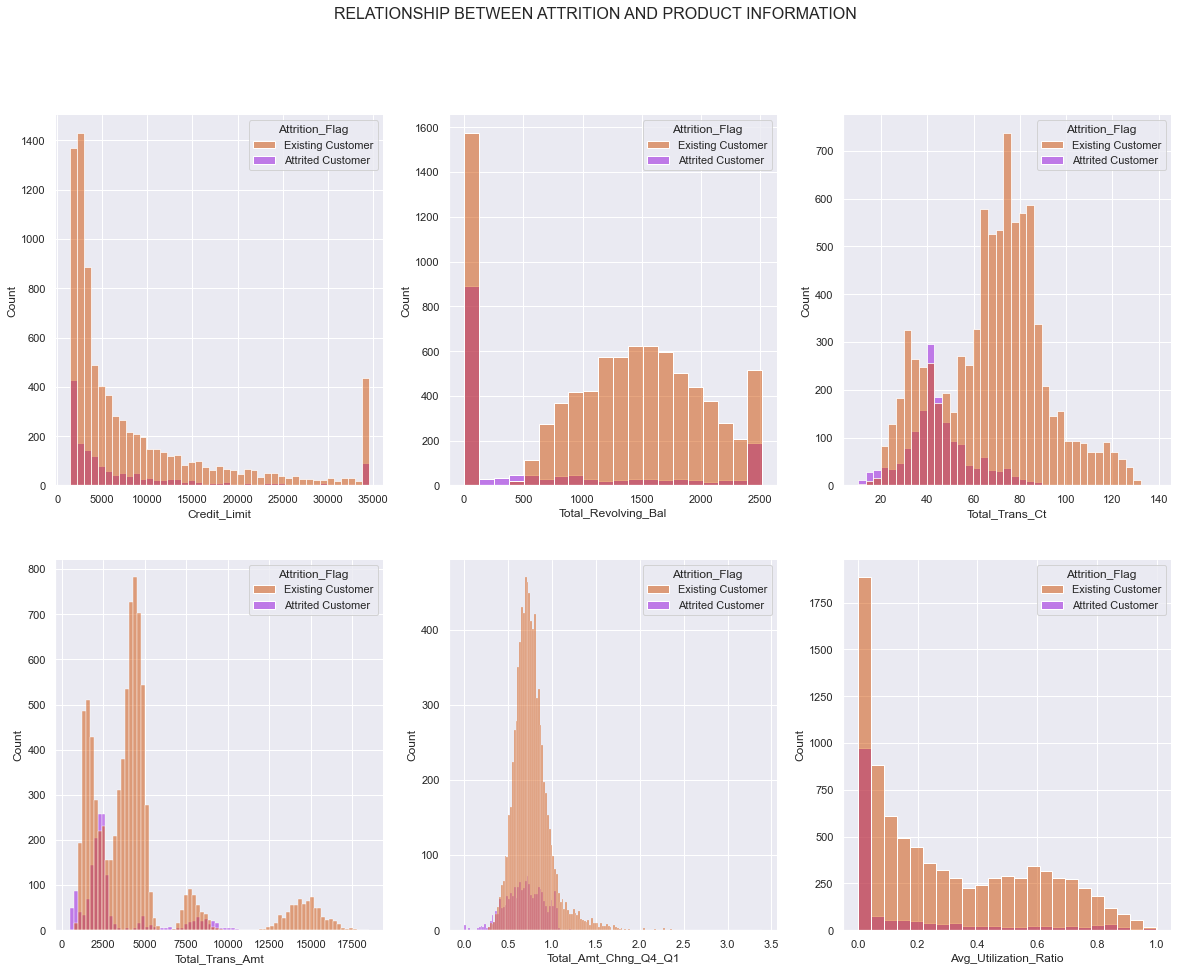

In [83]:
# Checking the relationship between attrition and product information.

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('RELATIONSHIP BETWEEN ATTRITION AND PRODUCT INFORMATION', fontsize = 16)
sns.histplot(ax=axes[0, 0], data =df, x='Credit_Limit',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[0, 1], data=df, x='Total_Revolving_Bal',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[0, 2], data=df, x='Total_Trans_Ct',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 0], data=df, x='Total_Trans_Amt',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 1], data =df, x='Total_Amt_Chng_Q4_Q1',hue='Attrition_Flag',palette='gnuplot_r')
sns.histplot(ax=axes[1, 2], data=df, x='Avg_Utilization_Ratio',hue='Attrition_Flag',palette='gnuplot_r')
sns.despine()

Observations:
- Total Revolving Balance: Customers that had a lower revolving balance were the most likely to leave. This could indicate that those customers could have left because they found other lower interest rates to other companies that offered better products at lower rates.
- Total Trans Ct:Customers who churn make fewer transactions using the bank's card than the customers that stay. This means that levels of inactivity are a contributing factor to churning.

- Total Trans Amt: Churning customers spend lesser than non churning customers therefore the lower the transaction amounts the higher the correlation with attrition.  
- Avg Utilization Ratio: the average card utilization ratio is higher for the existing customers.

Male customers have a higher credit limit than female customers. From this insight we can try to check if there is a discrepancy in the earnings among the genders.

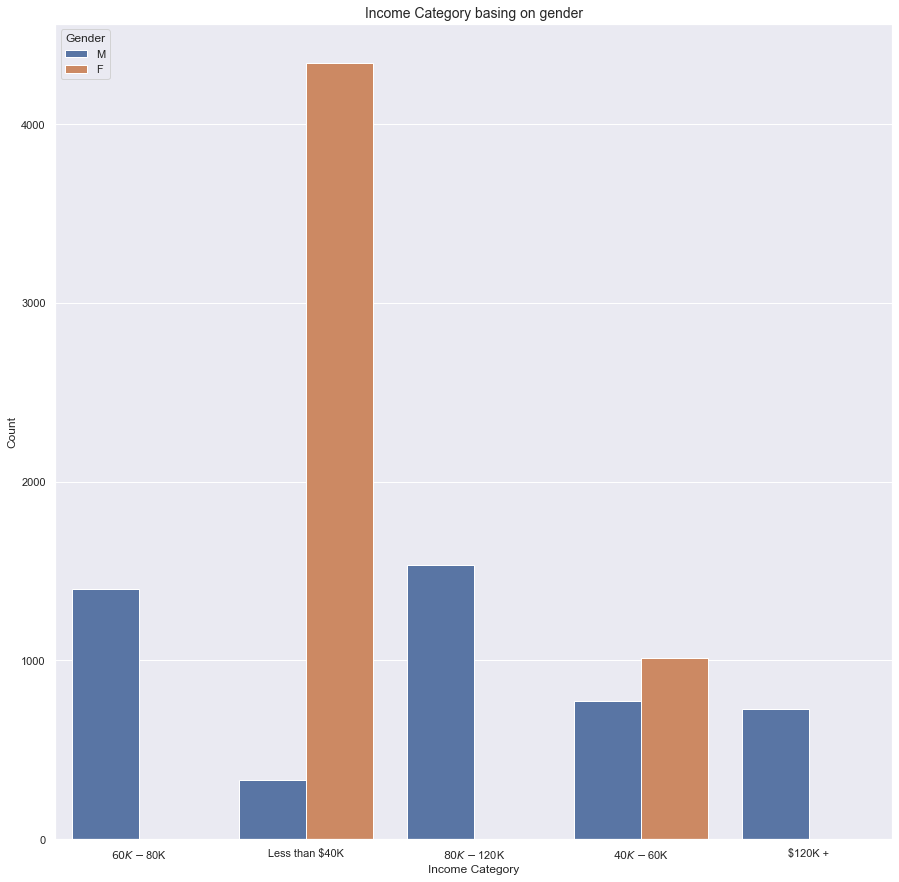

In [84]:
#Income distribution by Gender

fontsize=14
sns.countplot(x='Income_Category',hue='Gender',data=df)
sns.set(rc={'figure.figsize':(15,15)})
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.title("Income Category basing on gender",fontsize=fontsize)
plt.show() ;

Comparing a cross all the income category we can say that male earn more than females

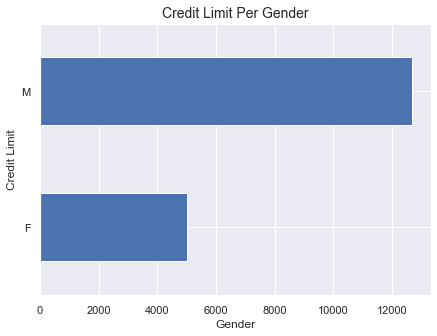

In [85]:
# Checking the credit limit for each gender.

plt.figure(figsize= (7,5))
fontsize = 14
df.groupby('Gender')['Credit_Limit'].mean().plot(kind ='barh').set_xlabel(('Credit Limit'))
plt.xlabel('Gender')
plt.ylabel('Credit Limit')
plt.title('Credit Limit Per Gender',fontsize=fontsize)
plt.show()

Male have high credit limit than females 

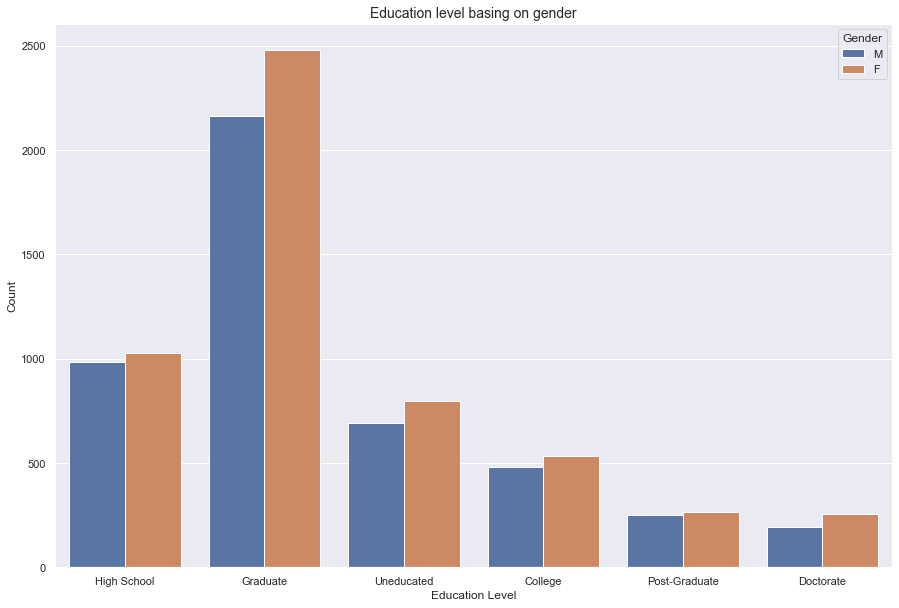

In [145]:
#Plotting education distribution by Gender 

plt.figure(figsize= (15,10))
fontsize = 14
sns.countplot(x='Education_Level',hue='Gender',data=df)
sns.set(rc={'figure.figsize':(12,5)})
plt.xlabel("Education Level")
plt.ylabel('Count')
plt.title("Education level basing on gender",fontsize=fontsize)
plt.show() ;

Comparing across the bar graph shows female costumers have a high education level compared to male costumers 


MULTIVARIATE ANALYSIS

In [86]:
# Encoding the categorical variables.

from sklearn.preprocessing import LabelEncoder
categ= ['Attrition_Flag','Gender', 'Income_Category', 'Card_Category','Education_Level', 'Marital_Status']
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

## Feeature Engineering

In [96]:
#Spliting data to Feature and target set
X=df.drop('Attrition_Flag',axis=1)
y =df[['Attrition_Flag']]

Feature Selection

Random Forest Classifier

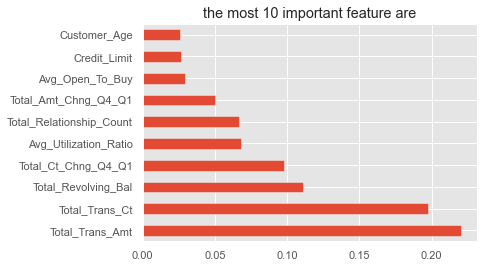

In [99]:
#Importing the model 
from sklearn.ensemble import RandomForestClassifier
#Create model 
model = RandomForestClassifier(n_estimators=100)
#Fit model and train 
model.fit(X,y)
#Get importance of resulting features
importance = model.feature_importances_
#Create DataFrame for visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('the most 10 important feature are')
plt.show()

## Modeling 

Splitting feature and Target set 

In [101]:
X = df[['Total_Trans_Amt','Total_Trans_Ct','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Total_Relationship_Count',
       'Total_Amt_Chng_Q4_Q1','Credit_Limit','Avg_Open_To_Buy','Customer_Age']]
y = df[['Attrition_Flag']]

Class imbalance

Using SMOTE Technique

In [102]:
# Dealing with class imbalance using smote technique.

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

Spliting to train and test 

In [103]:
#Spliting to train and test to make sure the all models have same random state
from sklearn.model_selection import train_test_split

# Splitting our train and test sets.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2, random_state=42)

### Logistic Regression

In [104]:
# Importing our model.

from sklearn.linear_model import LogisticRegression

# Fit and Training the model.
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Predicting using the trained model.

y_pred=LogReg.predict(X_test)


In [107]:
# Evaluating the model performance.

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, explained_variance_score,classification_report

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7676470588235295
[[1310  414]
 [ 376 1300]]
0.7584597432905484
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1724
           1       0.76      0.78      0.77      1676

    accuracy                           0.77      3400
   macro avg       0.77      0.77      0.77      3400
weighted avg       0.77      0.77      0.77      3400



Model Optimization

In [108]:
# Optimizing our model

from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
param_grid = [{'penalty': ['l1', 'l2'], 
               'C': np.logspace(0, 4, 5),
               'solver' : ['lbfgs', 'newton-cg', 'liblinear','saga'],
               'max_iter' : [5, 10]
               }
              ]

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(model, param_grid = param_grid, cv=5, verbose=0, scoring = 'accuracy')

In [110]:
# Fitting grid search
best_clf = clf.fit(X_train, y_train)
#Getting best Parameters
print('Best Parameters:', best_clf.best_params_)

Best Parameters: {'C': 1.0, 'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [112]:
#Fitting model with best parameters 

model = LogisticRegression(penalty='l1', C=1.0, max_iter=10, solver='liblinear')

#Fitting the model:
model.fit(X_train,y_train)

#Predicting using trained model 
y_pred=model.predict(X_test)

#Evaluating model after optimization
Log= precision_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.8385294117647059
[[1420  304]
 [ 245 1431]]
0.8247838616714698
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1724
           1       0.82      0.85      0.84      1676

    accuracy                           0.84      3400
   macro avg       0.84      0.84      0.84      3400
weighted avg       0.84      0.84      0.84      3400



### Random Forest Classifier

In [116]:
#Importing model 

from sklearn.ensemble import RandomForestClassifier
Forest = RandomForestClassifier()

#Fit and train the model
Forest.fit(X_train, y_train )

#Applying the trained model to make a prediction:
y_pred = Forest.predict(X_test)

In [124]:
# Evaluating the model performance.

Ran=precision_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9758823529411764
[[1701   23]
 [  59 1617]]
0.9859756097560975
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1724
           1       0.99      0.96      0.98      1676

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400



In [123]:
#Checking for overfitting 

print(f'Train Accuracy: {Forest.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {Forest.score(X_test, y_test):.2f}')

Train Accuracy: 1.00
Test Accuracy: 0.98


There is no overfitting

### LIGHTGBM

In [127]:
# Importing the model

import lightgbm as lgb

#Fit and training the model 
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

#Predicting using trained model 
y_pred=model.predict(X_test)

[20]	training's binary_logloss: 0.178916	valid_0's binary_logloss: 0.194858
[40]	training's binary_logloss: 0.0898972	valid_0's binary_logloss: 0.110853
[60]	training's binary_logloss: 0.0585009	valid_0's binary_logloss: 0.0845406
[80]	training's binary_logloss: 0.0424377	valid_0's binary_logloss: 0.0738609
[100]	training's binary_logloss: 0.0319571	valid_0's binary_logloss: 0.0676938


In [128]:
# Evaluating the model performance.

GBM= precision_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9761764705882353
[[1701   23]
 [  58 1618]]
0.9859841560024375
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1724
           1       0.99      0.97      0.98      1676

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400



In [129]:
# Checking for overfitting.

print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.9940
Testing accuracy 0.9762


### KNN

In [130]:
# Importing model 

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
#fit and train model 
classifier.fit(X_train, y_train)
#Predicting with trained model 
y_pred = classifier.predict(X_test)

In [131]:
#Evaluating model  performance

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8973529411764706
[[1618  106]
 [ 243 1433]]
0.9311241065627031
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1724
           1       0.93      0.86      0.89      1676

    accuracy                           0.90      3400
   macro avg       0.90      0.90      0.90      3400
weighted avg       0.90      0.90      0.90      3400



Model Optimization

In [133]:
#Hyperparameter Tuning using random search 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
neighbor_range = np.arange(1, 41)
knn = KNeighborsClassifier()

params = {'n_neighbors' : neighbor_range,
         'weights' : ['uniform', 'distance'],
         'metric' : ['manhattan', 'euclidean', 'minkowski','hamming']}

kfolds = KFold(n_splits = 5)
rscv = RandomizedSearchCV(knn, params, random_state = 0)
rscv.fit(X_train, y_train)
print("Best parameters:", rscv.best_params_)

Best parameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'minkowski'}


In [135]:
#Fittng model with best parameters

knn_b = KNeighborsClassifier(n_neighbors=4, weights='distance',metric='minkowski')
#Train model 
knn_b.fit(X_train,y_train)
#Predict using model 
y_pred = knn_b.predict(X_test)

#Evaluating model performance after optimization 
Knn= precision_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9064705882352941
[[1637   87]
 [ 231 1445]]
0.9432114882506527
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1724
           1       0.94      0.86      0.90      1676

    accuracy                           0.91      3400
   macro avg       0.91      0.91      0.91      3400
weighted avg       0.91      0.91      0.91      3400



### NEURAL NETWORKS

In [137]:
#Importing model 

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

# fit and train model 
mlp.fit(X_train,y_train)

#Predict using trained model 
y_pred=mlp.predict(X_test)

#Evaluting model performance

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8102941176470588
[[1519  205]
 [ 440 1236]]
0.8577376821651631
              precision    recall  f1-score   support

           0       0.78      0.88      0.82      1724
           1       0.86      0.74      0.79      1676

    accuracy                           0.81      3400
   macro avg       0.82      0.81      0.81      3400
weighted avg       0.82      0.81      0.81      3400



Model optimzation

In [138]:
#Hyperparameter tuning using Gridsearch

param_grid = {
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam', 'sgd', 'lbfgs']}
#Using the classifier along with grid search:
mlp=MLPClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(mlp, param_grid = param_grid, cv= 5, verbose = 0, scoring = 'neg_mean_squared_error' )

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Getting best parameters 
best_clf.best_params_

{'alpha': 0.05, 'learning_rate': 'adaptive', 'solver': 'adam'}

In [139]:
#Using the best parameters from hyperparameter tuning:
Final = MLPClassifier(activation = 'identity', alpha =  0.05, hidden_layer_sizes = (10,10,10),
                               learning_rate = 'adaptive', solver = 'adam')

#Fit and training model after tuning:
Final.fit(X_train,y_train )

#Predicting values:
y_pred = Final.predict(X_test)

#Evaluating model performance after tuning 

NN= precision_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7141176470588235
[[ 965  759]
 [ 213 1463]]
0.6584158415841584
              precision    recall  f1-score   support

           0       0.82      0.56      0.67      1724
           1       0.66      0.87      0.75      1676

    accuracy                           0.71      3400
   macro avg       0.74      0.72      0.71      3400
weighted avg       0.74      0.71      0.71      3400



### Model performance Comparision 

In [140]:
# Model Comparison:
Models =  pd.DataFrame({'Model': ['Logistic Regression',' Random Forest', 
                                'KNN','Neural Network','LIGHTGBM'],
                     'Precision score': [Log*100, Ran*100, Knn*100, NN*100,GBM*100 ]})
Models.sort_values(by = 'Precision score', ascending = False)

,Model,Precision score
4,LIGHTGBM,98.598416
1,Random Forest,98.597561
2,KNN,94.321149
0,Logistic Regression,82.478386
3,Neural Network,65.841584


## Conculsion

* The best model to use is the LIGHTGBM Model.

* Product variables give more importance in determining whether or not a customer churns.

* Most of the attrited costumers are those with graduate level of education compared to the other levels with the lowest attrition levels coming from those post graduate.

* Most of the customers who are likely to churn out are those who earn  less than 40,000 a year.

## Recommendations


* The bank should have a sort of promotion programme towards those customers with undergraduate degrees.

* The bank should look more into those earning less than 40000 a year and find a way to provide favourable services.

* Since the majority of the customers are between 40-50 years in age, the banks can create retention campaigns and loyalty programs such as VIP treatment, getting merchandise for them and giving for free, value customer week and offering cashbacks. This will make the customers feel valued and their needs taken care of which allows the company to have sustainable growth. Retaining the older ones will assure you of higher return of value.

* Most females are more likely to churn out. From the analysis we can see that women get a relatively low bargain when it comes to credit limits. The banks can form women groups to also encourage them on taking up business credit cards which will empower them to grow their ventures and let them know they have the bank's backing.

* Moreover, our model will be able to tell who's more likely to churn out even before they do. The bank can use this to their advantage since it acts as a warning to them on whom to follow up on. This way, they can have a team that can approach the suspected clients and see how they can improve their services to their liking. But not to forget, they may also need to consider the clients with high debts and not really encourage them to undertake any more credit usage.

